In [1]:
# sklearn package
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
# dataframes
import pandas as pd
# computation
import numpy as np
# visualization
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('case.csv')
pr = pd.read_csv('case.csv', nrows=1)
pr = pr[['x1','x2','x3','x4','x5']].dropna()
df = df[['y','x1','x2','x3','x4','x5']].dropna()

print(df.sample(n=15))

            y     x1    x2       x3    x4      x5
174  100.1399  3.107  4.60  3028.85  16.8  222653
45   102.8157  1.470  3.02  2301.62  30.7  242766
55   103.4340  1.965  3.07  2334.96  30.1  230725
118   98.1990  2.669  3.08  2442.58   9.0  147645
5    103.9464  4.049  3.25  1824.05  11.7  394222
198   98.7884  2.042  5.20  2912.05  18.3  269575
182  102.0279  2.111  4.79  3670.79  16.9  254096
179  102.3074  2.275  4.53  3812.55  24.3  243352
192   99.0974  1.563  4.69  2931.50  19.0  275030
67   100.0545  1.621  2.94  2253.96  35.3  215414
237   91.3384  1.006  5.02  1176.51  12.4  150731
257   89.8626  0.729  5.67  1438.14   2.0  127457
189  100.6919  1.612  4.82  3347.75  20.7  271595
135   95.1263  2.801  3.65  2813.35   8.9  139144
43   102.3826  2.006  2.94  2333.11  31.0  243817


In [3]:
x_values = df[['x1','x2','x3','x4','x5']].values
y_values = df['y'].values
x_train, x_test, y_train, y_test = train_test_split(
    x_values, y_values, test_size=0.3, random_state=1)
print(x_values[0], y_values[0])

[2.83700e+00 4.04000e+00 1.46259e+03 4.40000e+00 4.05948e+05] 104.7474


In [4]:
import statsmodels.api as sm
X_train_lm = sm.add_constant(x_train)

lr_1 = sm.OLS(y_train, X_train_lm).fit()

lr_1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.673
Model:                            OLS   Adj. R-squared:                  0.664
Method:                 Least Squares   F-statistic:                     76.16
Date:                Mon, 16 Jan 2023   Prob (F-statistic):           4.68e-43
Time:                        16:54:23   Log-Likelihood:                -475.73
No. Observations:                 191   AIC:                             963.5
Df Residuals:                     185   BIC:                             983.0
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         85.9284      1.600     53.722      0.000      82.773      89.084
x1             0.8422      0.428      1.967      0.051      -0.003       1.687
x2            -1.0539      0.218     -4.824      0.000      -1.485      -0.623
x3             0.0027      0.001      5.019      0.000       0.002       0.004
x4             0.1242      0.020      6.097      0.000       0.084       0.164
x5          2.598e-05   4.34e-06      5.982      0.000    1.74e-05    3.45e-05
==============================================================================
Omnibus:                       32.240   Durbin-Watson:                   2.029
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               48.229
Skew:                          -0.944   Prob(JB):                     3.37e-11
Kurtosis:                       4.580   Cond. No.                     1.56e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.56e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [5]:
df = pd.read_csv('case.csv')
df = df.drop('x1', axis=1)
pr = pd.read_csv('case.csv', nrows=1)
pr = pr.drop('x1', axis=1)
pr = pr[['x2','x3','x4','x5']].dropna()
df = df[['y','x2','x3','x4','x5']].dropna()

In [6]:
x_values = df[['x2','x3','x4','x5']].values
y_values = df['y'].values
x_train, x_test, y_train, y_test = train_test_split(
    x_values, y_values, test_size=0.3, random_state=100)
print(x_values[0], y_values[0])

[4.04000e+00 1.46259e+03 4.40000e+00 4.05948e+05] 104.7474


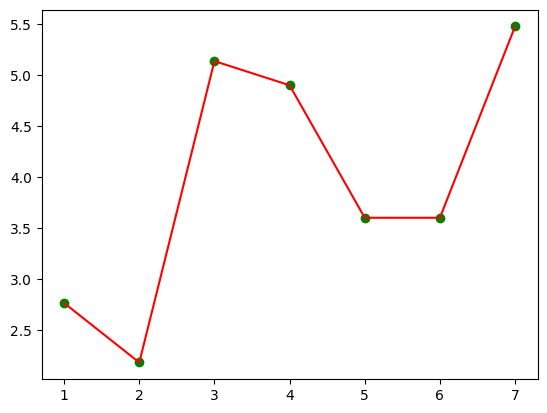

In [7]:
number_degrees = [1, 2, 3, 4, 5, 6, 7]
plt_mean_squared_error = []
for degree in number_degrees:
    poly_model = PolynomialFeatures(degree=degree)
    poly_x_values = poly_model.fit_transform(x_train)
    poly_model.fit(poly_x_values, y_train)
    regression_model = LinearRegression()
    regression_model.fit(poly_x_values, y_train)
    poly_x_pred_values = poly_model.fit_transform(x_test)
    y_pred = regression_model.predict(poly_x_pred_values)
    plt_mean_squared_error.append(mean_squared_error(y_test, y_pred, squared=False))
plt.scatter(number_degrees,plt_mean_squared_error, color="green")
plt.plot(number_degrees,plt_mean_squared_error, color="red")

In [8]:
print(plt_mean_squared_error)


[2.7672400710226093, 2.1850339777826466, 5.137856178811271, 4.900888802188419, 3.6028410543074347, 3.602914065774202, 5.4770344052782365]


In [9]:

deg = plt_mean_squared_error.index(min(plt_mean_squared_error)) +1
poly_model = PolynomialFeatures(deg)
poly_x_values = poly_model.fit_transform(x_values)
poly_model.fit(poly_x_values, y_values)
regression_model = LinearRegression()
regression_model.fit(poly_x_values, y_values)
poly_x_pred_values = poly_model.fit_transform(pr)
y_pred = regression_model.predict(poly_x_pred_values)

print(f"Dla stopnia {deg}: {y_pred}")

Dla stopnia 2: [102.29782118]
